In [4]:
# Import the necessary libraries for the task.
import torch  # Import PyTorch for deep learning.
import torch.nn as nn  # Import the neural network module from PyTorch.
import torch.nn.functional as F  # Import the functional module from PyTorch for activation functions.

import numpy as np  # Import NumPy for numerical operations.
import matplotlib.pyplot as plt  # Import Matplotlib for plotting.
from IPython import display  # Import IPython display for rendering plots.
display.set_matplotlib_formats('svg')  # Set the plot format to SVG.


/tmp/ipykernel_10423/2228048250.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')  # Set the plot format to SVG.


In [5]:
# Import the Iris dataset using Seaborn and store it as 'iris'.
import seaborn as sns
iris = sns.load_dataset('iris')

# Convert the dataset from a Pandas DataFrame to a PyTorch tensor and set the data type to float.
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# Transform species labels to numerical values.
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2


In [19]:
len(labels[labels==1])

50

In [7]:
data.shape

torch.Size([150, 4])

In [8]:
# Define a custom neural network class 'ANNiris' with customizable hidden units and layers.
class ANNiris(nn.Module):
    def __init__(self, nUnits, nLayers):
        super().__init__()

        # Create a dictionary to store the layers.
        self.layers = nn.ModuleDict()
        self.nLayers = nLayers

        # Input layer.
        self.layers['input'] = nn.Linear(4, nUnits)

        # Hidden layers.
        for i in range(nLayers):
            self.layers[f'hidden{i}'] = nn.Linear(nUnits, nUnits)

        # Output layer.
        self.layers['output'] = nn.Linear(nUnits, 3)

    # Forward pass through the network.
    def forward(self, x):
        x = F.relu(self.layers['input'](x))  # Input layer (with ReLU activation).

        # Hidden layers with ReLU activation.
        for i in range(self.nLayers):
            x = F.relu(self.layers[f'hidden{i}'](x))

        x = self.layers['output'](x)  # Output layer.
        return x


In [9]:
# Define the number of hidden units per layer and the number of layers.
nUnitsPerLayer = 12
nLayers = 4

# Create an instance of the 'ANNiris' model with specified parameters.
net = ANNiris(nUnitsPerLayer, nLayers)


In [10]:
net.layers

ModuleDict(
  (input): Linear(in_features=4, out_features=12, bias=True)
  (hidden0): Linear(in_features=12, out_features=12, bias=True)
  (hidden1): Linear(in_features=12, out_features=12, bias=True)
  (hidden2): Linear(in_features=12, out_features=12, bias=True)
  (hidden3): Linear(in_features=12, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)

In [11]:
net.layers['input']

Linear(in_features=4, out_features=12, bias=True)

In [12]:
# Generate random input data with 10 samples and 4 dimensions.
tmpx = torch.randn(10, 4)

# Pass the data through the neural network.
y = net(tmpx)

# Display the shape of the output and the output itself.
print(y.shape)
print(' ')
print(y)


torch.Size([10, 3])
 
tensor([[-0.1279, -0.3352,  0.2223],
        [-0.1258, -0.3368,  0.2231],
        [-0.1291, -0.3331,  0.2215],
        [-0.1267, -0.3353,  0.2232],
        [-0.1312, -0.3319,  0.2213],
        [-0.1271, -0.3348,  0.2230],
        [-0.1278, -0.3337,  0.2230],
        [-0.1291, -0.3336,  0.2221],
        [-0.1290, -0.3319,  0.2228],
        [-0.1277, -0.3334,  0.2231]], grad_fn=<AddmmBackward0>)


In [13]:
tmpx

tensor([[-6.1401e-01, -1.1907e+00,  9.7699e-01,  5.7174e-01],
        [-4.8349e-02,  2.4103e+00,  1.2780e+00, -6.1225e-01],
        [ 1.2277e+00, -6.7530e-01, -1.6015e+00, -3.8047e-01],
        [-7.2132e-03,  1.1952e+00,  1.3103e+00, -2.0037e-01],
        [ 6.2023e-01,  9.9560e-01, -1.7541e+00, -4.3979e-01],
        [ 9.4258e-01,  1.6022e+00,  1.3518e+00, -1.3129e+00],
        [ 8.5168e-01, -1.2217e+00,  7.0451e-01, -1.6552e+00],
        [ 1.1779e+00,  1.0072e+00, -1.1421e+00, -3.7994e-01],
        [-6.1799e-01, -8.9225e-01, -9.6947e-01, -7.5597e-01],
        [ 9.6784e-04, -4.1551e-03, -2.4759e-01,  8.9518e-01]])

In [14]:
# Define a function 'trainTheModel' to train the neural network.
def trainTheModel(theModel):
    # Define the loss function and optimizer.
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(theModel.parameters(), lr=0.01)

    # Loop over epochs for training.
    for epoch in range(numepochs):
        # Forward pass.
        yHat = theModel(data)

        # Compute the loss.
        loss = lossfun(yHat, labels)

        # Backpropagation.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Final forward pass to get accuracy.
    predictions = theModel(data)
    predlabels = torch.argmax(predictions, axis=1)
    acc = 100 * torch.mean((predlabels == labels).float())

    # Calculate the total number of trainable parameters in the model.
    nParams = sum(p.numel() for p in theModel.parameters() if p.requires_grad)

    # Return accuracy and the number of parameters.
    return acc, nParams


In [15]:
# Test the 'trainTheModel' function.
numepochs = 2500
acc = trainTheModel(net)

# Check the outputs (tuple containing accuracy and number of parameters).
acc


(tensor(33.3333), 723)

In [16]:
# Define the model parameters: number of layers and number of units per layer.
numlayers = range(1, 6)  # Number of hidden layers.
numunits = np.arange(4, 101, 3)  # Units per hidden layer.

# Initialize matrices to store accuracies and total parameters.
accuracies = np.zeros((len(numunits), len(numlayers)))
totalparams = np.zeros((len(numunits), len(numlayers)))

# Number of training epochs.
numepochs = 500

# Start the experiment by varying the number of units and layers.
for unitidx in range(len(numunits)):
    for layeridx in range(len(numlayers)):
        # Create a fresh model instance.
        net = ANNiris(numunits[unitidx], numlayers[layeridx])

        # Train the model and store the results.
        acc, nParams = trainTheModel(net)
        accuracies[unitidx, layeridx] = acc

        # Store the total number of parameters in the model.
        totalparams[unitidx, layeridx] = nParams


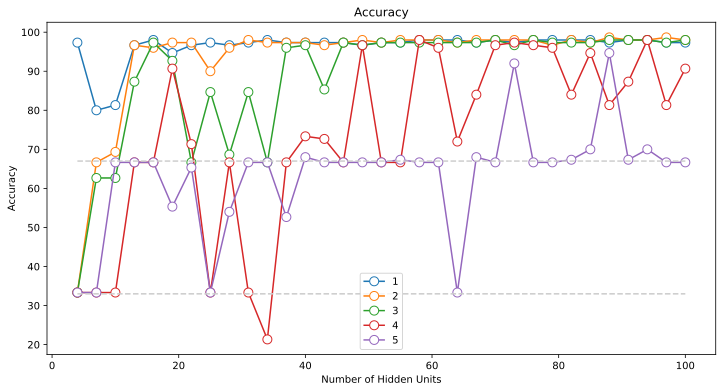

In [17]:
# Show accuracy as a function of the number of hidden units for different layers.
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(numunits, accuracies, 'o-', markerfacecolor='w', markersize=9)
ax.plot(numunits[[0, -1]], [33, 33], '--', color=[0.8, 0.8, 0.8])
ax.plot(numunits[[0, -1]], [67, 67], '--', color=[0.8, 0.8, 0.8])
ax.legend(numlayers)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Hidden Units')
ax.set_title('Accuracy')
plt.show()


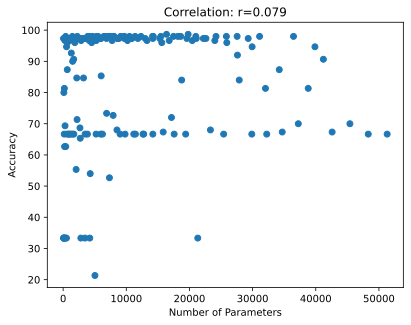

In [18]:
# Analyze the correlation between the number of parameters and accuracy.
x = totalparams.flatten()
y = accuracies.flatten()

# Calculate the correlation coefficient.
r = np.corrcoef(x, y)[0, 1]

# Scatter plot of parameters vs. accuracy.
plt.plot(x, y, 'o')
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.title('Correlation: r=' + str(np.round(r, 3)))
plt.show()
